# Project (E) 448
## Gaussian Kernel Regression - Multi-dimentional data


### Daniël S. van der Westhuizen
### 17158680

In [69]:
#imports
import numpy as np
import pylab as pl
from numpy.linalg import inv
from functions import *
import time

### Two-Dimensional synthetic data

Here I will use Gaussian process kernel regression and apply it to synthetic data with a two-dimensional input. The data is shown in the figure below.

In [70]:
T = 100 #number of training points

c1 = time.process_time() 

x_train = np.random.rand(2,T)*2 - 1
x_train = x_train.transpose()
t_train = np.random.rand(T)
for a in range(0,T):
    x_loc = x_train[a,0]
    y_loc = x_train[a,1]
    r1 = np.exp( -( (( np.sqrt((x_loc+0.6)**2 + (y_loc+0.4)**2) ))**2) / (2*(0.3**2)) )
    r2 = np.exp( -( (( np.sqrt((x_loc)**2 + (y_loc)**2) ))**2) / (2*(0.2**2)) )
    r3 = np.exp( -( (( np.sqrt((x_loc-0.3)**2 + (y_loc-0.6)**2) ))**2) / (2*(0.2**2)) )
    t_train[a] = r1 + r2 + r3
    
c2 = time.process_time() 
print("Time spent is %f" % (c2-c1))

Time spent is 0.015625


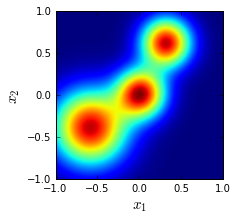

In [71]:
%matplotlib inline
pl.figure(figsize=(3,3))

#figure
t_actual_grid = np.zeros((100,100))
for a in range(0,100):
    for b in range(0,100):
        x_loc = -1 + (b*0.02)
        y_loc = -1 + (a*0.02)
        r1 = np.exp( -( (( np.sqrt((x_loc+0.6)**2 + (y_loc+0.4)**2) ))**2) / (2*(0.3**2)) )
        r2 = np.exp( -( (( np.sqrt((x_loc)**2 + (y_loc)**2) ))**2) / (2*(0.2**2)) )
        r3 = np.exp( -( (( np.sqrt((x_loc-0.3)**2 + (y_loc-0.6)**2) ))**2) / (2*(0.2**2)) )
        t_actual_grid[a][b] = r1 + r2 + r3

pl.imshow(t_actual_grid, extent=[-1,1,1,-1])
pl.ylabel(r"$x_2$", fontsize=15)
pl.xlabel(r'$x_1$', fontsize=15)
pl.gca().invert_yaxis()

I will use random training points (shown below) over the input space.

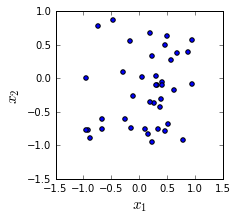

In [72]:
%matplotlib inline
pl.figure(figsize=(3,3))
pl.scatter(x_train[:,0],x_train[:,1])
pl.ylabel(r'$x_2$', fontsize=15)
pl.xlabel(r'$x_1$', fontsize=15)

In [73]:
theta0 = 1
theta1 = 5
theta2 = 1
theta3 = 1
beta = 4

#Test point grid
c1 = time.process_time() 
pred_means = np.zeros(400)
pred_vars = np.zeros(400)
x_test = np.zeros((400,2))
t_test = np.zeros(400)
row_count = 0
column_count = 0
for a in range(0,20):
    for b in range(0,20):
        x_loc = -1 + (b*0.1)
        y_loc = -1 + (a*0.1)
        x_test[a+20*b,0] = x_loc
        x_test[a+20*b,1] = y_loc
        r1 = np.exp( -( (( np.sqrt((x_loc+0.6)**2 + (y_loc+0.4)**2) ))**2) / (2*(0.3**2)) )
        r2 = np.exp( -( (( np.sqrt((x_loc)**2 + (y_loc)**2) ))**2) / (2*(0.2**2)) )
        r3 = np.exp( -( (( np.sqrt((x_loc-0.3)**2 + (y_loc-0.6)**2) ))**2) / (2*(0.2**2)) )
        t_test[(a*20)+b] = r1 + r2 + r3
#t_test = t_test.transpose()
#t_test = t_test.ravel()
c2 = time.process_time() 
print("Time spent is %f" % (c2-c1))



Time spent is 0.015625


In [74]:
#prediction algorithm
c1 = time.process_time()          
for a in range(0,400):
    C_N, k, k_T, c, C_N_full, inv_cov_N = gauss_proc_kern_reg_cov(x_train,x_test[a,:],theta0,theta1,theta2,theta3,beta)
    pred_means[a] = gauss_proc_kern_reg_pred_mean(k_T,C_N,t_train, inv_cov_N)
    pred_vars[a] = gauss_proc_kern_reg_pred_var(c,k_T,C_N,k, inv_cov_N)
c2 = time.process_time()  
print("Time spent is %f" % (c2-c1))

Time spent is 22.328125


In [75]:
#calculate an array of the errors
print(np.shape(t_test))
print(np.shape(pred_means))
pred_difference = pred_means - t_test
pred_error = np.abs(pred_difference)
print(np.average(pred_difference))
print(np.average(pred_error))

(400,)
(400,)
0.0102267471538
0.192745902822


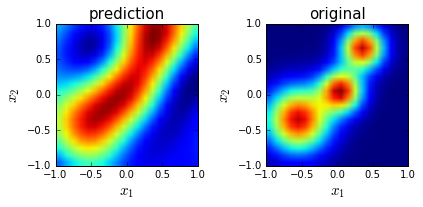

In [76]:
%matplotlib inline
pl.figure(figsize=(6,3))
pl.subplot(1, 2, 1)
pl.imshow(pred_means.reshape(20,20).transpose(), extent=[-1,1,1,-1])
pl.gca().invert_yaxis()
pl.title("prediction", fontsize=15)
pl.ylabel(r'$x_2$', fontsize=15)
pl.xlabel(r'$x_1$', fontsize=15)

pl.subplot(1, 2, 2)
pl.imshow(t_test.reshape(20,20), extent=[-1,1,1,-1])
pl.gca().invert_yaxis()
pl.title("original", fontsize=15)
pl.ylabel(r'$x_2$', fontsize=15)
pl.xlabel(r'$x_1$', fontsize=15)

pl.tight_layout()

In order to prevent the calculations from taking too long, I reduced the the number of test points and by extension the resolution of these two pictures. Bishop explains that number of calculations needed for this method is the function O(N^3), where N is number of training points. This is contrary to linear regression, where the computational complexity function is O(M^3) where M is the number of basis functions, which exponentially increases with the number of dimensions. It is thus unfeasible to use linear regression on data sets with large numbers (more than five) of dimensions. Contrariwise, using Gaussian process kernel regression is be feasible with data sets with a large number (more than five) of dimensions. Guassian process kernel regression instead has its practically limited by the number of training and test points.

Surprisingly the parameter optimization takes only a fraction of that time.

In [77]:
c1 = time.process_time()  
N = 20
e1,e2,e3,e4,e5,e6,e7,e8 = optim_kern_param(theta0,theta1,theta2,theta3,beta,N,x_train,t_train)
theta0_new = e1; theta1_new = e2; theta2_new = e3; theta3_new = e4
theta0_array = e5; theta1_array = e6; theta2_array = e7; theta3_array = e8
c2 = time.process_time()  
print("Time spent is %f" % (c2-c1))

Time spent is 3.250000


Below: How the parameters changed over iterations of optimization.

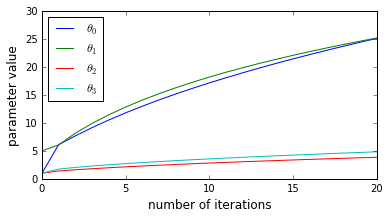

In [78]:
%matplotlib inline
pl.figure(figsize=(6,3))

plot_x = np.arange(0,N+1,1)

pl.plot(plot_x,theta0_array,label=r"$\theta_0$")
pl.plot(plot_x,theta1_array,label=r"$\theta_1$")
pl.plot(plot_x,theta2_array,label=r"$\theta_2$")
pl.plot(plot_x,theta3_array,label=r"$\theta_3$")
pl.ylabel('parameter value', fontsize=12)
pl.xlabel('number of iterations', fontsize=12)
pl.legend(loc='upper left')

In [79]:
c1 = time.process_time() 
for a in range(0,400):
    C_N, k, k_T, c, C_N_full, inv_cov_N = gauss_proc_kern_reg_cov(x_train,x_test[a,:],theta0_new,theta1_new,theta2_new,theta3_new,beta)
    pred_means[a] = gauss_proc_kern_reg_pred_mean(k_T,C_N,t_train, inv_cov_N)
    pred_vars[a] = gauss_proc_kern_reg_pred_var(c,k_T,C_N,k, inv_cov_N)
c2 = time.process_time()
print("Time spent is %f" % (c2-c1))

Time spent is 21.484375


In [80]:
#calculate an array of the errors
print(np.shape(t_test))
print(np.shape(pred_means))
pred_difference = pred_means - t_test
pred_error = np.abs(pred_difference)
print(np.average(pred_difference))
print(np.average(pred_error))

(400,)
(400,)
-0.00405200094832
0.17961891301


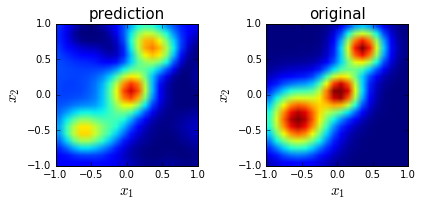

In [81]:
%matplotlib inline
pl.figure(figsize=(6,3))
pl.subplot(1, 2, 1)
pl.imshow(pred_means.reshape(20,20).transpose(), extent=[-1,1,1,-1],vmin = 0, vmax=1.1)
pl.gca().invert_yaxis()
pl.title("prediction", fontsize=15)
pl.ylabel(r'$x_2$', fontsize=15)
pl.xlabel(r'$x_1$', fontsize=15)

pl.subplot(1, 2, 2)
pl.imshow(t_test.reshape(20,20), extent=[-1,1,1,-1],vmin = 0, vmax=1)
pl.gca().invert_yaxis()
pl.title("original", fontsize=15)
pl.ylabel(r'$x_2$', fontsize=15)
pl.xlabel(r'$x_1$', fontsize=15)

pl.tight_layout()

Above: The improved prediction after optimization.

In [14]:
np.shape(x_train)

(20, 2)

In [15]:
np.shape(x_test)

(400, 2)

### Real-life data

I will use the wine quality data set. I will at first only use a small number of the data points and see how long the computation takes.

In [16]:
from numpy import loadtxt
lines = loadtxt("winequality-red-shuffled.csv", comments="#", delimiter=";", unpack=False)

In [17]:
for a in range(0,11):
    lines[:,a] = (lines[:,a] - np.average(lines[:,a])) / (np.average(np.abs(lines[:,a])))

In [18]:
lines

array([[  2.16791575e-02,  -3.55841632e-01,   6.23762376e-01, ...,
         -4.27697220e-02,   2.65775050e-02,   5.00000000e+00],
       [ -2.30735693e-01,   7.99125577e-02,  -4.83348335e-01, ...,
         -2.70681693e-01,  -1.17335229e-01,   5.00000000e+00],
       [ -2.30735693e-01,  -3.17949964e-01,   9.55895590e-01, ...,
          4.13054220e-01,   1.89678604e-01,   6.00000000e+00],
       ..., 
       [ -1.94676429e-01,  -2.04274957e-01,  -3.60036004e-03, ...,
         -1.33934510e-01,   8.41425987e-02,   6.00000000e+00],
       [  1.17837196e-01,  -2.42166626e-01,   8.08280828e-01, ...,
         -1.64322773e-01,  -9.81468648e-02,   5.00000000e+00],
       [ -1.46597410e-01,   1.55695895e-01,  -9.26192619e-01, ...,
         -8.83521162e-02,  -6.93643179e-02,   6.00000000e+00]])

In [19]:
train_N = 50
test_N = 500

wine_train_x = lines[:train_N,:11]
wine_train_y = lines[:train_N,11]
wine_test_x = lines[train_N:train_N+test_N,:11]
wine_test_y = lines[train_N:train_N+test_N,11]

In [20]:
np.shape(lines)

(1599, 12)

In [21]:
np.shape(wine_test_x)

(500, 11)

Below is the block that makes the unoptimized prediction. I found that I can use all the dimensions  and still have a short computation time. The computation time increases linearly with the number of test points and as a square of the number of training points. I will use test this method with 40 training points and 500 test points, which takes about 30 seconds to make a prediction without optimization.

In [22]:
theta0 = 2
theta1 = 9
theta2 = 1
theta3 = 1
beta = 4

In [23]:
#prediction of the training points before optimization
c1 = time.process_time() 
train_pred_means = np.zeros(train_N)
train_pred_vars = np.zeros(train_N)
for a in range(0,train_N):
    C_N, k, k_T, c, C_N_full, inv_cov_N = gauss_proc_kern_reg_cov(wine_train_x,wine_train_x[a,:],theta0,theta1,theta2,theta3,beta)
    train_pred_means[a] = gauss_proc_kern_reg_pred_mean(k_T,C_N,wine_train_y, inv_cov_N)
    train_pred_vars[a] = gauss_proc_kern_reg_pred_var(c,k_T,C_N,k, inv_cov_N)
c2 = time.process_time()
print("Time spent is %f" % (c2-c1))

Time spent is 4.625000


In [24]:
#prediction of the test points before optimization
c1 = time.process_time() 
test_pred_means = np.zeros(test_N)
test_pred_vars = np.zeros(test_N)
for a in range(0,test_N):
    C_N, k, k_T, c, C_N_full, inv_cov_N = gauss_proc_kern_reg_cov(wine_train_x,wine_test_x[a,:],theta0,theta1,theta2,theta3,beta)
    test_pred_means[a] = gauss_proc_kern_reg_pred_mean(k_T,C_N,wine_train_y, inv_cov_N)
    test_pred_vars[a] = gauss_proc_kern_reg_pred_var(c,k_T,C_N,k, inv_cov_N)
c2 = time.process_time()
print("Time spent is %f" % (c2-c1))

Time spent is 44.062500


In [25]:
print("average of the predicted output of the test points:",np.average(test_pred_means))
print("average of the actual output of the test points:",np.average(wine_test_y))
print("average of the predicted output of the training points:",np.average(train_pred_means))
print("average of the actual output of the training points:",np.average(wine_train_y))
print(np.average(np.abs(test_pred_means - wine_test_y)))
print(np.average(np.abs(train_pred_means - wine_train_y)))

average of the predicted output of the test points: 5.30243489369
average of the actual output of the test points: 5.672
average of the predicted output of the training points: 5.5142385858
average of the actual output of the training points: 5.54
0.672074527796
0.0718947697763


The training points are well predicted even though optimization has not been done. Lets's optimize it.

In [26]:
c1 = time.process_time() 

N = 20
e1,e2,e3,e4,e5,e6,e7,e8 = optim_kern_param(theta0,theta1,theta2,theta3,beta,N,x_train,t_train)
theta0_new = e1; theta1_new = e2; theta2_new = e3; theta3_new = e4
theta0_array = e5; theta1_array = e6; theta2_array = e7; theta3_array = e8

c2 = time.process_time()
print("Time spent is %f" % (c2-c1))

Time spent is 0.718750


In [27]:
#prediction of the training points after optimization
c1 = time.process_time() 
train_pred_means = np.zeros(train_N)
train_pred_vars = np.zeros(train_N)
for a in range(0,train_N):
    C_N, k, k_T, c, C_N_full, inv_cov_N = gauss_proc_kern_reg_cov(wine_train_x,wine_train_x[a,:],theta0_new,theta1_new,theta2_new,theta3_new,beta)
    train_pred_means[a] = gauss_proc_kern_reg_pred_mean(k_T,C_N,wine_train_y, inv_cov_N)
    train_pred_vars[a] = gauss_proc_kern_reg_pred_var(c,k_T,C_N,k, inv_cov_N)
c2 = time.process_time()
print("Time spent is %f" % (c2-c1))

Time spent is 4.093750


In [28]:
#prediction of the test points after optimization

c1 = time.process_time() 
test_pred_means = np.zeros(test_N)
test_pred_vars = np.zeros(test_N)
for a in range(0,test_N):
    C_N, k, k_T, c, C_N_full, inv_cov_N = gauss_proc_kern_reg_cov(wine_train_x,wine_test_x[a,:],theta0_new,theta1_new,theta2_new,theta3_new,beta)
    test_pred_means[a] = gauss_proc_kern_reg_pred_mean(k_T,C_N,wine_train_y, inv_cov_N)
    test_pred_vars[a] = gauss_proc_kern_reg_pred_var(c,k_T,C_N,k, inv_cov_N)
c2 = time.process_time()
print("Time spent is %f" % (c2-c1))

Time spent is 43.843750


Optimized result:

In [29]:
print("average of the predicted ratings of the test points:",np.average(test_pred_means))
print("average of the actual ratings of the test points:",np.average(wine_test_y))
print("average of the predicted ratings of the training points:",np.average(train_pred_means))
print("average of the actual ratings of the training points:",np.average(wine_train_y))
train_error_average = np.average(np.abs(test_pred_means - wine_test_y))
test_error_average = np.average(np.abs(train_pred_means - wine_train_y))
print(train_error_average)
print(test_error_average)

average of the predicted ratings of the test points: 5.04043994886
average of the actual ratings of the test points: 5.672
average of the predicted ratings of the training points: 5.53358239119
average of the actual ratings of the training points: 5.54
0.787691405432
0.00928987743618


In [30]:
#Outputs:
#test_pred_means: predicted values of the test points
#train_pred_means: predicted values of the training points
#test_error_average: The average error of the test points

The training points is well predicted. The test points are good as well, but the much lower outputs of the training points dampens the effectiveness.

I will now also try this method with another data set, a diabetes data set. Its inputs are continuous and its output is a binary class. I will replace all the missing values in this data set with the average value of that attribute. I willl use a small selection (30) of the entries as the training data.

In [36]:
from numpy import loadtxt
lines = loadtxt("pima.csv", comments="#", delimiter=",", unpack=False, usecols=(1,2,3,4,5,6,7,8,9), skiprows=1)
lines

array([[   7.   ,  147.   ,   76.   , ...,    0.257,   43.   ,    1.   ],
       [   5.   ,  132.   ,   80.   , ...,    0.186,   69.   ,    0.   ],
       [   1.   ,   80.   ,   74.   , ...,    0.527,   22.   ,    0.   ],
       ..., 
       [   9.   ,  145.   ,   88.   , ...,    0.771,   53.   ,    1.   ],
       [   2.   ,  108.   ,   80.   , ...,    0.259,   52.   ,    1.   ],
       [   9.   ,  106.   ,   52.   , ...,    0.38 ,   42.   ,    0.   ]])

In [37]:
np.shape(lines)

(768, 9)

In [38]:
for a in range(0,np.shape(lines)[0]):
    for b in range(0,8):
        if (lines[a,b] == 0):
            lines[a,b] = np.sum(lines[:,b]) / ( np.shape(lines[:,b].tolist())[0]  - lines[:,b].tolist().count(0.)  )

for a in range(0,8):
    lines[:,a] = (lines[:,a] - np.average(lines[:,a])) / (np.average(np.abs(lines[:,a])))

In [39]:
train_N = 30
test_N = 500

diab_train_x = lines[:train_N,:8]
diab_train_y = lines[:train_N,8]
diab_test_x = lines[train_N:train_N+test_N,:8]
diab_test_y = lines[train_N:train_N+test_N,8]

In [40]:
theta0 = 2
theta1 = 9
theta2 = 1
theta3 = 1
beta = 4
c1 = time.process_time() 
train_pred_means = np.zeros(train_N)
train_pred_vars = np.zeros(train_N)
for a in range(0,train_N):
    C_N, k, k_T, c, C_N_full, inv_cov_N = gauss_proc_kern_reg_cov(diab_train_x,diab_train_x[a,:],theta0,theta1,theta2,theta3,beta)
    train_pred_means[a] = gauss_proc_kern_reg_pred_mean(k_T,C_N,diab_train_y, inv_cov_N)
    train_pred_vars[a] = gauss_proc_kern_reg_pred_var(c,k_T,C_N,k, inv_cov_N)

test_pred_means = np.zeros(test_N)
test_pred_vars = np.zeros(test_N)
for a in range(0,test_N):
    C_N, k, k_T, c, C_N_full, inv_cov_N = gauss_proc_kern_reg_cov(diab_train_x,diab_test_x[a,:],theta0,theta1,theta2,theta3,beta)
    test_pred_means[a] = gauss_proc_kern_reg_pred_mean(k_T,C_N,diab_train_y, inv_cov_N)
    test_pred_vars[a] = gauss_proc_kern_reg_pred_var(c,k_T,C_N,k, inv_cov_N)
c2 = time.process_time()
print("Time spent is %f" % (c2-c1))

Time spent is 16.890625


I let the algorhithm treat the output as a continuous variable and rounded it to the nearest class when it finished. Below are the results.

In [41]:
print("predicted number of positive cases in the test points:",np.sum(np.rint(test_pred_means)))
print("actual number of positive cases in the test points:",np.sum(diab_test_y))
print("predicted number of positive cases in the training points:",np.sum(np.rint(train_pred_means)))
print("actual number of positive cases in the training points:",np.sum(diab_train_y))
print(   np.sum (np.abs(  np.rint(test_pred_means)  -   diab_test_y  )  )   )
print(   np.sum (np.abs(  np.rint(train_pred_means)  -   diab_train_y  )  )  )

predicted number of positive cases in the test points: 112.0
actual number of positive cases in the test points: 183.0
predicted number of positive cases in the training points: 11.0
actual number of positive cases in the training points: 11.0
151.0
0.0


In [42]:
print(diab_train_y)
print(np.rint(train_pred_means))

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.
  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.  0.  0.]
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.
  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.  0.  0.]


In [43]:
c1 = time.process_time() 

N = 100 #Number of iterations
e1,e2,e3,e4,e5,e6,e7,e8 = optim_kern_param(theta0,theta1,theta2,theta3,beta,N,x_train,t_train)
theta0_new = e1; theta1_new = e2; theta2_new = e3; theta3_new = e4
theta0_array = e5; theta1_array = e6; theta2_array = e7; theta3_array = e8

c2 = time.process_time()
print("Time spent is %f" % (c2-c1))

Time spent is 1.734375


In [44]:
c1 = time.process_time() 
train_pred_means = np.zeros(train_N)
train_pred_vars = np.zeros(train_N)
for a in range(0,train_N):
    C_N, k, k_T, c, C_N_full, inv_cov_N = gauss_proc_kern_reg_cov(diab_train_x,diab_train_x[a,:],theta0_new,theta1_new,theta2_new,theta3_new,beta)
    train_pred_means[a] = gauss_proc_kern_reg_pred_mean(k_T,C_N,diab_train_y, inv_cov_N)
    train_pred_vars[a] = gauss_proc_kern_reg_pred_var(c,k_T,C_N,k, inv_cov_N)


test_pred_means = np.zeros(test_N)
test_pred_vars = np.zeros(test_N)
for a in range(0,test_N):
    C_N, k, k_T, c, C_N_full, inv_cov_N = gauss_proc_kern_reg_cov(diab_train_x,diab_test_x[a,:],theta0_new,theta1_new,theta2_new,theta3_new,beta)
    test_pred_means[a] = gauss_proc_kern_reg_pred_mean(k_T,C_N,diab_train_y, inv_cov_N)
    test_pred_vars[a] = gauss_proc_kern_reg_pred_var(c,k_T,C_N,k, inv_cov_N)
c2 = time.process_time()
print("Time spent is %f" % (c2-c1))

Time spent is 16.218750


optimized result:

In [45]:
print("predicted number of positive cases in the test points:",np.sum(np.rint(test_pred_means)))
print("actual number of positive cases in the test points:",np.sum(diab_test_y))
print("predicted number of positive cases in the training points:",np.sum(np.rint(train_pred_means)))
print("actual number of positive cases in the training points:",np.sum(diab_train_y))
print(   np.sum (np.abs(  np.rint(test_pred_means)  -   diab_test_y  )  )   )
print(   np.sum (np.abs(  np.rint(train_pred_means)  -   diab_train_y  )  )  )

predicted number of positive cases in the test points: 85.0
actual number of positive cases in the test points: 183.0
predicted number of positive cases in the training points: 11.0
actual number of positive cases in the training points: 11.0
162.0
0.0


In [ ]:
c1 = time.perf_counter()  
f=0
for n in range(0,100000):
    f += 1;
c2 = time.perf_counter()
print("Time spent is %f" % (c2-c1))